# Loading the libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Sales data analysis

In [56]:
sale_df = pd.read_excel('For Sale Data Combined.xlsx')
sale_df.head()

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Lot/land area unit,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country
0,https://www.zillow.com/homedetails/573-W-Canyo...,NaN,House for sale,Single Family,NaN,4200000.0,Yes,75000.0,11/27/2023,6782.0,...,acres,4.0,6.0,Realty ONE Group,NaN,573 W Canyon Way,Chandler,85248,AZ,USA
1,https://www.zillow.com/homedetails/3954-E-Cres...,NaN,House for sale,Single Family,NaN,874899.0,No,NaN,NaN,3868.0,...,sqft,5.0,3.0,Integrity All Stars,NaN,3954 E Crescent Pl,Chandler,85249,AZ,USA
2,https://www.zillow.com/homedetails/3351-S-Eagl...,NaN,Lot / Land for sale,Lot/Land,NaN,1500000.0,No,NaN,NaN,NaN,...,acres,NaN,NaN,USELLSMART Real Estate,NaN,3351 S Eagle Dr,Chandler,85286,AZ,USA
3,https://www.zillow.com/homedetails/4401-W-Earh...,NaN,Lot / Land for sale,Lot/Land,NaN,1150000.0,Yes,50000.0,10/19/2023,NaN,...,acres,NaN,NaN,Aim Realty,NaN,4401 W Earhart Way #28A,Chandler,85226,AZ,USA
4,https://www.zillow.com/homedetails/4494-W-Lind...,NaN,Lot / Land for sale,Lot/Land,NaN,895000.0,Yes,30000.0,02/01/2024,NaN,...,acres,NaN,NaN,HomeSmart,NaN,4494 W Lindbergh Way #30A,Chandler,85226,AZ,USA


In [57]:
sale_df.columns

Index(['Property URL', 'MLS ID', 'Listing description', 'Property type',
       'Number of days on Zillow', 'Property price (USD)', 'Price was cut',
       'Price cut amount (USD)', 'Price cut date (MM/DD/YYYY)', 'Living area',
       'Living area unit', 'Price per living area unit (USD)', 'Lot/land area',
       'Lot/land area unit', 'Bedrooms', 'Bathrooms', 'Broker name',
       'Broker agent', 'Street address', 'City', 'Zip', 'State', 'Country'],
      dtype='object')

#### Handle Missing Values

In [58]:
sale_df.isnull().sum()

Property URL                           0
MLS ID                              1719
Listing description                    0
Property type                          0
Number of days on Zillow             807
Property price (USD)                   6
Price was cut                          0
Price cut amount (USD)              1129
Price cut date (MM/DD/YYYY)         1129
Living area                          132
Living area unit                     132
Price per living area unit (USD)     138
Lot/land area                        442
Lot/land area unit                   409
Bedrooms                              61
Bathrooms                             50
Broker name                           18
Broker agent                        1560
Street address                         0
City                                   0
Zip                                    0
State                                  0
Country                                0
dtype: int64

In [59]:
# drop the columns with more than 30% missing values    
sale_df = sale_df.dropna(thresh=sale_df.shape[0]*0.7,axis=1)
sale_df.isnull().sum()

Property URL                          0
Listing description                   0
Property type                         0
Property price (USD)                  6
Price was cut                         0
Living area                         132
Living area unit                    132
Price per living area unit (USD)    138
Lot/land area                       442
Lot/land area unit                  409
Bedrooms                             61
Bathrooms                            50
Broker name                          18
Street address                        0
City                                  0
Zip                                   0
State                                 0
Country                               0
dtype: int64

In [60]:
# Now drop the rows with missing values
sale_df = sale_df.dropna()
sale_df.shape

(1165, 18)

#### Remove Outliers

In [61]:
# plot the distribution of the target variable by plotly
import plotly.express as px
fig = px.histogram(sale_df, x="Property price (USD)", nbins=100, title='Price Distribution')
fig.show()



- There are many outliers present in the sale data 
- to remove the outlier we have to remove by quantile method

In [62]:
# get the threhold for outlier detection by removing data above 3/2 of Q3
Q1 = sale_df['Property price (USD)'].quantile(0.25)
Q3 = sale_df['Property price (USD)'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR
print(threshold)
sale_df = sale_df[sale_df['Property price (USD)'] < threshold]
sale_df.shape

2268000.0


(988, 18)

<Axes: ylabel='Frequency'>

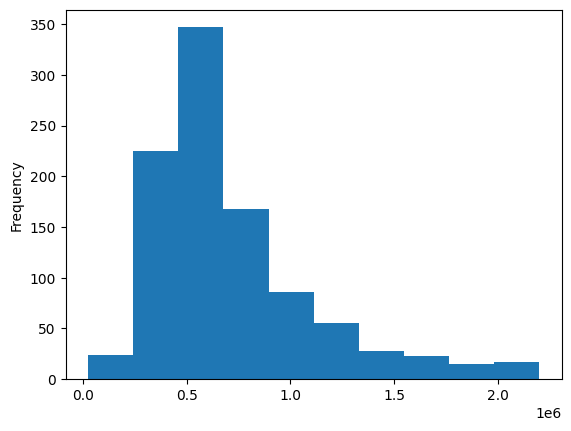

In [63]:
sale_df['Property price (USD)'].plot(kind='hist')

### Change Datatypes

In [64]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 1 to 1718
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property URL                      988 non-null    object 
 1   Listing description               988 non-null    object 
 2   Property type                     988 non-null    object 
 3   Property price (USD)              988 non-null    float64
 4   Price was cut                     988 non-null    object 
 5   Living area                       988 non-null    float64
 6   Living area unit                  988 non-null    object 
 7   Price per living area unit (USD)  988 non-null    float64
 8   Lot/land area                     988 non-null    float64
 9   Lot/land area unit                988 non-null    object 
 10  Bedrooms                          988 non-null    float64
 11  Bathrooms                         988 non-null    float64
 12  Broker name 

In [65]:
# change the zip to object
sale_df['Zip'] = sale_df['Zip'].astype('object')


In [66]:
# make a single unit for area
sale_df['Lot/land area unit'].value_counts()

Lot/land area unit
sqft     852
acres    136
Name: count, dtype: int64

In [67]:
mask = sale_df['Lot/land area unit'] == 'acres'
sale_df.loc[mask, 'Lot/land area'] = sale_df.loc[mask, 'Lot/land area'] * 43560
sale_df.loc[mask, 'Lot/land area unit'] = 'sqft'

### Sales Analyses

In [68]:
# plot the distribution of the target variable price for different property types by plotly
import plotly.express as px
fig = px.box(sale_df, x="Property type", y="Property price (USD)")
fig.show()



In [69]:
# plot the distribution of the target variable price for different states by plotly
import plotly.express as px
fig = px.box(sale_df, x="State", y="Property price (USD)")
fig.show()

In [70]:
# plot the distribution of the target variable price for different cities by plotly
import plotly.express as px
fig = px.box(sale_df, x="City", y="Property price (USD)")
fig.show()

In [71]:
sale_df.columns

Index(['Property URL', 'Listing description', 'Property type',
       'Property price (USD)', 'Price was cut', 'Living area',
       'Living area unit', 'Price per living area unit (USD)', 'Lot/land area',
       'Lot/land area unit', 'Bedrooms', 'Bathrooms', 'Broker name',
       'Street address', 'City', 'Zip', 'State', 'Country'],
      dtype='object')

In [72]:
# plot the scatter plot of the target variable price and the area of the property
import plotly.express as px
fig = px.scatter(sale_df, x="Living area", y="Property price (USD)", title='Price vs Area',trendline="ols")
fig.show()

<Axes: >

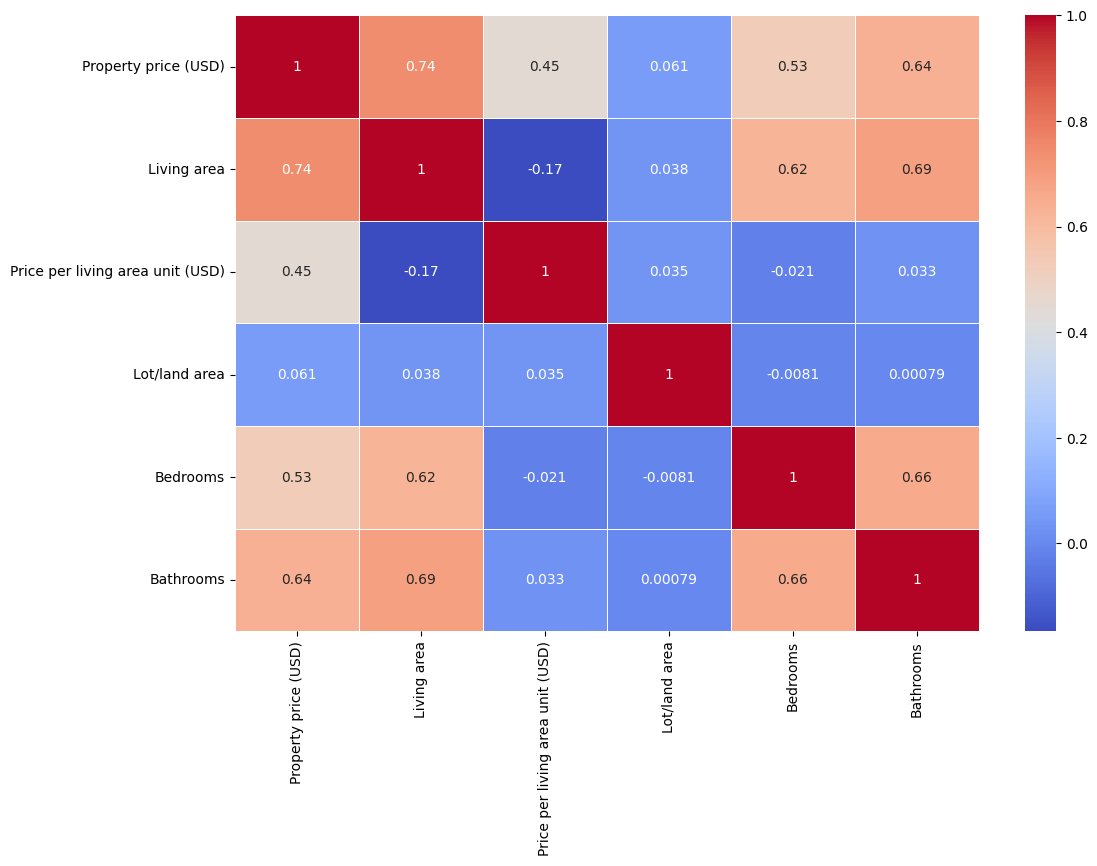

In [73]:
# check the correlation of the numerical variables by seaborn
plt.figure(figsize=(12,8))
sns.heatmap(sale_df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm',linewidths=.5)


### Modeling

In [74]:
# Remove the price per living area unit as it cause leakage for the columns
sale_df.drop('Price per living area unit (USD)', axis=1, inplace=True)

In [75]:
sale_df.columns

Index(['Property URL', 'Listing description', 'Property type',
       'Property price (USD)', 'Price was cut', 'Living area',
       'Living area unit', 'Lot/land area', 'Lot/land area unit', 'Bedrooms',
       'Bathrooms', 'Broker name', 'Street address', 'City', 'Zip', 'State',
       'Country'],
      dtype='object')

In [76]:
sale_df.drop(['Property URL', 'Listing description','Price was cut','Living area unit','Lot/land area unit','Broker name','Street address','Zip','Country'], axis=1, inplace=True)

In [77]:
available_sales_column = sale_df.columns.to_list()

In [78]:
sale_df = pd.get_dummies(sale_df, drop_first=True, columns=['Property type', 'State', 'City'])

In [79]:
sale_df.head()

,Property price (USD),Living area,Lot/land area,Bedrooms,Bathrooms,Property type_Condominium,Property type_Multi Family,Property type_Single Family,Property type_Townhouse,Property type_Unknown,...,City_Chandler,City_Chicago,City_Corona,City_Flushing,City_Gilbert,City_Lake Oswego,City_Miami,City_Milwaukie,City_Portland,City_Sun Lakes
1,874899.0,3868.0,7927.0,5.0,3.0,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
6,1888000.0,3363.0,92347.2,4.0,2.0,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
7,1095000.0,3599.0,13503.6,4.0,4.0,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
8,675000.0,2458.0,8775.0,3.0,2.0,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
9,800000.0,2579.0,8302.0,3.0,3.0,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = sale_df.select_dtypes(exclude='object').drop('Property price (USD)', axis=1)


y = sale_df['Property price (USD)']
sales_features_indices = X.columns.to_list()
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
sales_model_lr = model
y_pred = model.predict(X_test)


In [81]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


Mean Squared Error: 41150223285.526375
R2 Score: 0.7375246726507995
Mean Absolute Error: 138201.51957384634


In [82]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42,max_features='sqrt')
model.fit(X_train, y_train)

sales_model_rf = model
y_pred = model.predict(X_test)


In [83]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 47020367626.00832
R2 Score: 0.7000821526755315
Mean Absolute Error: 132081.65155844158


### Exploring Rent Dataset 

In [84]:
# load the rental data
rental_df = pd.read_excel('For Rent Data Combined.xlsx')
rental_df.head()

,Property URL,Property type,Rental price (USD per month),Living area,Living area unit,Price per living area unit (USD),Bedrooms,Bathrooms,Street address,City,Zip,State,Country
0,https://www.zillow.com/apartments/chandler-az/...,Building,NaN,NaN,NaN,NaN,NaN,NaN,3330 S Gilbert Rd Unit 1007,Chandler,85286,AZ,USA
1,https://www.zillow.com/b/the-ashley-luxury-tow...,Building,NaN,NaN,NaN,NaN,NaN,NaN,155 E Appleby Rd b2317b5,Chandler,85286,AZ,USA
2,https://www.zillow.com/apartments/chandler-az/...,Building,NaN,NaN,NaN,NaN,NaN,NaN,2177 S McQueen Rd -G,Chandler,85286,AZ,USA
3,https://www.zillow.com/apartments/chandler-az/...,Building,NaN,NaN,NaN,NaN,NaN,NaN,255 E Heights Rd dd75834f,Chandler,85249,AZ,USA
4,https://www.zillow.com/apartments/chandler-az/...,Building,NaN,NaN,NaN,NaN,NaN,NaN,1817 N Dobson Rd,Chandler,85224,AZ,USA


#### Handling Missing Values

In [85]:
rental_df.isnull().sum()

Property URL                          0
Property type                         0
Rental price (USD per month)        485
Living area                         561
Living area unit                    561
Price per living area unit (USD)    561
Bedrooms                            527
Bathrooms                           485
Street address                        9
City                                  0
Zip                                   0
State                                 0
Country                               0
dtype: int64

In [86]:
# drop the rows with missing target variable price
rental_df = rental_df.dropna(subset=['Rental price (USD per month)'])
# drop the rows with missing values
rental_df = rental_df.dropna()
rental_df.shape


(879, 13)

#### Remove Outliers

In [87]:
# get the threhold for outlier detection by removing data above 3/2 of Q3
Q1 = rental_df['Rental price (USD per month)'].quantile(0.25)
Q3 = rental_df['Rental price (USD per month)'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR
print(threshold)
rental_df = rental_df[rental_df['Rental price (USD per month)'] < threshold]
rental_df.shape


6663.75


(721, 13)

#### Change datatypes

In [88]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 56 to 1482
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property URL                      721 non-null    object 
 1   Property type                     721 non-null    object 
 2   Rental price (USD per month)      721 non-null    float64
 3   Living area                       721 non-null    float64
 4   Living area unit                  721 non-null    object 
 5   Price per living area unit (USD)  721 non-null    float64
 6   Bedrooms                          721 non-null    float64
 7   Bathrooms                         721 non-null    float64
 8   Street address                    721 non-null    object 
 9   City                              721 non-null    object 
 10  Zip                               721 non-null    int64  
 11  State                             721 non-null    object 
 12  Country    

In [89]:
# change the type of zip
rental_df['Zip'] = rental_df['Zip'].astype('object')

In [90]:
# check for the units of the area
rental_df['Living area unit'].value_counts()

Living area unit
sqft    721
Name: count, dtype: int64

In [91]:
# plot the distribution of the target variable price for different property types by plotly
import plotly.express as px
fig = px.box(rental_df, x="Property type", y="Rental price (USD per month)")
fig.show()

In [92]:
# plot the distribution of the target variable price for different states by plotly
import plotly.express as px
fig = px.box(rental_df, x="State", y="Rental price (USD per month)")
fig.show()

In [93]:
# plot the distribution of the target variable price for different cities by plotly
import plotly.express as px
fig = px.box(rental_df, x="City", y="Rental price (USD per month)")
fig.show()

In [94]:
# plot the scatter plot of the target variable price and the area of the property
import plotly.express as px
fig = px.scatter(rental_df, x="Living area", y="Rental price (USD per month)", title='Price vs Area',trendline="ols")
fig.show()

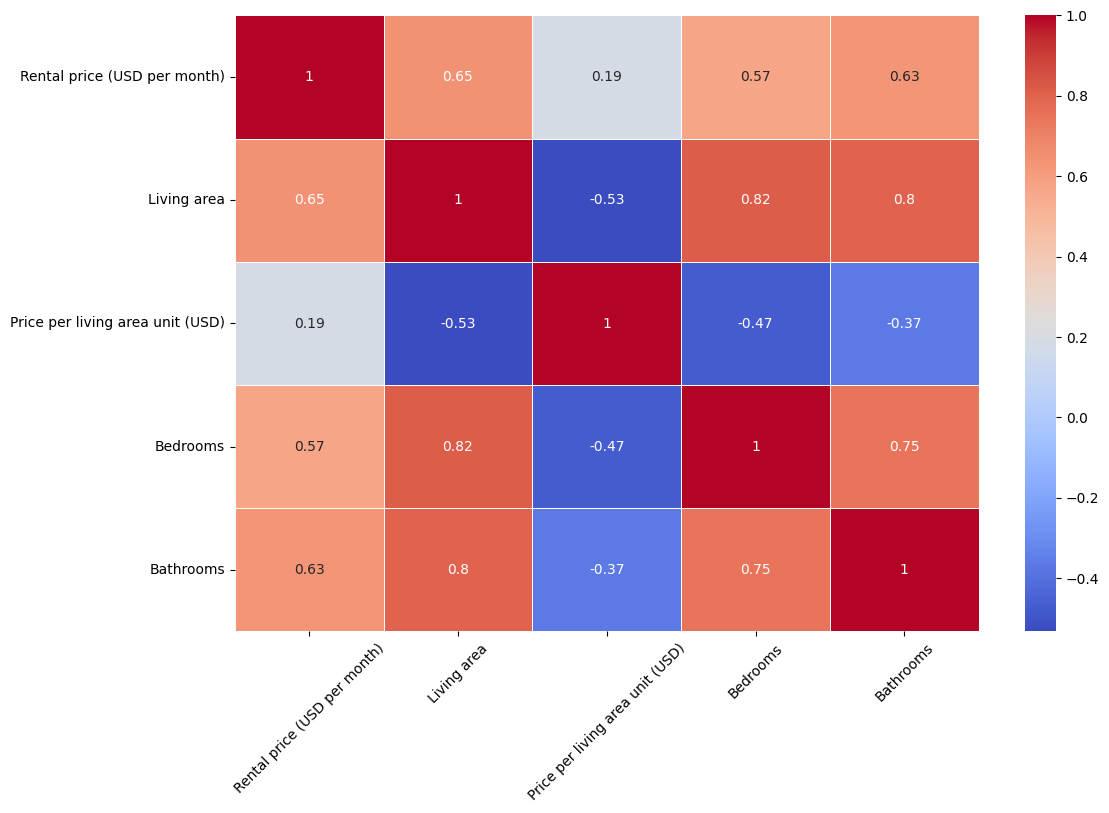

In [40]:
# plot the correlation of the numerical variables by seaborn
plt.figure(figsize=(12,8))
sns.heatmap(rental_df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm',linewidths=.5)
plt.xticks(rotation=45)
plt.show()

### Modeling

In [41]:
# Remove the price per living area unit as it cause leakage for the columns
rental_df.drop('Price per living area unit (USD)', axis=1, inplace=True)


In [42]:
rental_df.drop(['Property URL','Living area unit','Street address','Zip','Country'], axis=1, inplace=True)

In [43]:
rental_df.head()

,Property type,Rental price (USD per month),Living area,Bedrooms,Bathrooms,City,State
56,Single Family,2999.0,2948.0,4.0,3.0,Chandler,AZ
57,Single Family,2199.0,1312.0,3.0,2.0,Chandler,AZ
58,Townhouse,2300.0,1523.0,3.0,2.5,Chandler,AZ
59,Single Family,3299.0,2719.0,5.0,3.0,Chandler,AZ
60,Apartment,950.0,620.0,1.0,1.0,Chandler,AZ


In [44]:
available_rental_columns  = rental_df.columns.to_list()

In [45]:
rental_df = pd.get_dummies(rental_df, drop_first=True, columns=['Property type', 'State', 'City'])
rental_df.head()

,Rental price (USD per month),Living area,Bedrooms,Bathrooms,Property type_Condominium,Property type_Single Family,Property type_Townhouse,Property type_Unknown,State_CA,State_FL,...,State_OR,City_Chandler,City_Chicago,City_Corona,City_Flushing,City_Gilbert,City_Miami,City_Milwaukie,City_Portland,City_Sun Lakes
56,2999.0,2948.0,4.0,3.0,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
57,2199.0,1312.0,3.0,2.0,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
58,2300.0,1523.0,3.0,2.5,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
59,3299.0,2719.0,5.0,3.0,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
60,950.0,620.0,1.0,1.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [46]:
# model the rental price by linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = rental_df.select_dtypes(exclude='object').drop('Rental price (USD per month)', axis=1)
y = rental_df['Rental price (USD per month)']

rental_feature_indices = X.columns.to_list()
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(fit_intercept=True, copy_X=True)
model.fit(X_train, y_train)
rental_model_lr = model
y_pred = model.predict(X_test)


In [47]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 263176.81961780606
R2 Score: 0.6829354171896151
Mean Absolute Error: 336.5778187089092


In [48]:
# parameters for model is selected by grid search
model = RandomForestRegressor(random_state=42 , max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 300)
model.fit(X_train, y_train)
rental_model_rf = model
y_pred = model.predict(X_test)


In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 288930.54359265976
R2 Score: 0.6519083922420565
Mean Absolute Error: 354.6534536230109


## Build a comparison model for user to select sale or rent

In [50]:
available_sales_column

['Property type',
 'Property price (USD)',
 'Living area',
 'Lot/land area',
 'Bedrooms',
 'Bathrooms',
 'City',
 'State']

In [51]:
available_rental_columns

['Property type',
 'Rental price (USD per month)',
 'Living area',
 'Bedrooms',
 'Bathrooms',
 'City',
 'State']

In [52]:
# create a dataframe for the sale price prediction by available_sales_indices

sale_price_prediction = pd.DataFrame(columns=sales_features_indices)
# add first row of zeros
sale_price_prediction.loc[0] = 0
rental_price_prediction = pd.DataFrame(columns=rental_feature_indices)
# add first row of zeros
rental_price_prediction.loc[0] = 0

rental_price_prediction

,Living area,Bedrooms,Bathrooms,Property type_Condominium,Property type_Single Family,Property type_Townhouse,Property type_Unknown,State_CA,State_FL,State_IL,...,State_OR,City_Chandler,City_Chicago,City_Corona,City_Flushing,City_Gilbert,City_Miami,City_Milwaukie,City_Portland,City_Sun Lakes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Enter The Customer preference

In [53]:
# Ask the user to input the property details
property_type = "Single Family"
living_area = 2000
lot_area = 10000
bedrooms = 3
bathrooms = 2
state = "CA"
city = "Chicago"


In [54]:

sale_price_prediction["Living area"] = living_area
sale_price_prediction["Lot/land area"] = lot_area
sale_price_prediction["Bedrooms"] = bedrooms
sale_price_prediction["Bathrooms"] = bathrooms
sale_price_prediction["Property type_"+property_type] = 1
sale_price_prediction["State_"+state] = 1
sale_price_prediction["City_"+city] = 1

rental_price_prediction["Living area"] = living_area
rental_price_prediction["Bedrooms"] = bedrooms
rental_price_prediction["Bathrooms"] = bathrooms
rental_price_prediction["Property type_"+property_type] = 1
rental_price_prediction["State_"+state] = 1
rental_price_prediction["City_"+city] = 1

# create a dataframe for the input


sales_price = sales_model_lr.predict(sale_price_prediction)
rental_price = rental_model_lr.predict(rental_price_prediction)

print("The estimated sale price is: ", sales_price[0], "USD")
print("The estimated rental price is: ", rental_price[0],"USD")

The estimated sale price is:  1501916.7582563097 USD
The estimated rental price is:  4981.699239735148 USD


### Limitation of the Analysis
> - The Dataset Null values present a large limiation towards the usage of many columns that may have impact on the target price
> - The Size of the Dataset is small according to the goal of making a comparison model.